<a href="https://colab.research.google.com/github/Ayushmanv23/My-projects/blob/main/Handwritten_Digit_Recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handwritten Digit Classification with TensorFlow and Streamlit**

**Objective**

* Develop a machine learning model using TensorFlow to accurately classify handwritten digits from the MNIST dataset.

* Design a user-friendly web application using Streamlit that allows users to upload an image of a handwritten digit and receive the predicted classification.

**Data Source**

The MNIST dataset, a widely used collection of 70,000 grayscale images of handwritten digits (0-9).

**Import Library**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import cv2
import streamlit as st

**Import Data**

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Describe Data**

* The MNIST dataset consists of 60,000 training images and 10,000 testing images.
* Each image is a 28x28 pixel grayscale representation of a handwritten digit.
* The labels (y_train and y_test) are integers from 0 to 9 corresponding to the actual digit in the image.

**Data Visualization**

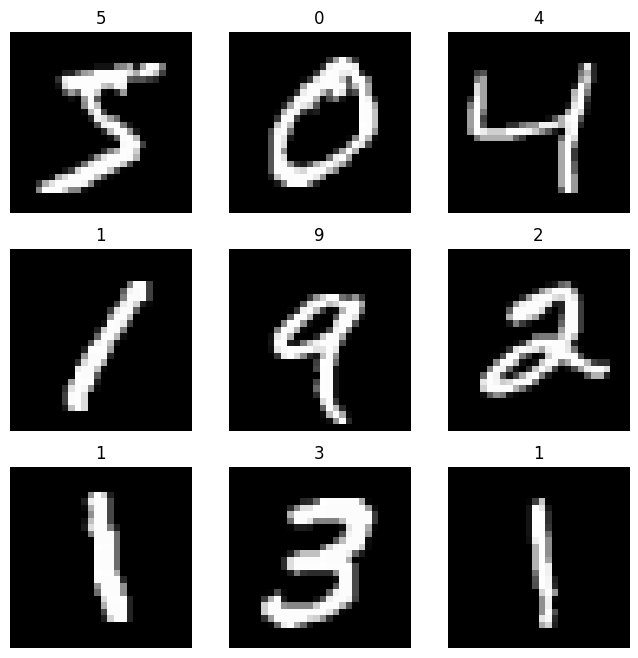

In [11]:
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

**Data Preprocessing**

* Normalization: Scale the pixel values between 0 and 1 for better training performance.

In [12]:
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

**Define Target Variable (y) and Feature Variables (X):**

* X: The features are the 2D arrays representing the flattened image data (28x28 pixels) after normalization.
* y: The target variable is the one-hot encoded representation of the digit labels (0-9).

**Train Test Split**

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

**Modeling**

In [14]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8435 - loss: 0.5441 - val_accuracy: 0.9494 - val_loss: 0.1685
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9584 - loss: 0.1407 - val_accuracy: 0.9642 - val_loss: 0.1169
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9737 - loss: 0.0863 - val_accuracy: 0.9674 - val_loss: 0.1055
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9808 - loss: 0.0616 - val_accuracy: 0.9706 - val_loss: 0.1000
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9863 - loss: 0.0460 - val_accuracy: 0.9732 - val_loss: 0.0946
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9897 - loss: 0.0331 - val_accuracy: 0.9682 - val_loss: 0.1103
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9903 - loss: 0.0278 - val_accuracy: 0.9750 - val_loss: 0.0914
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9932 - loss: 0.02

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

**Model Evaluation**

* Evaluate the model's accuracy on the validation set to assess its generalization ability.
* Consider using additional metrics like precision, recall, and F1-score for more comprehensive evaluation.

In [15]:
loss, accuracy = model.evaluate(X_val, y_val)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9771 - loss: 0.1075
Validation Loss: 0.11706167459487915
Validation Accuracy: 0.9757500290870667


**Prediction**

In [16]:
def predict_digit(image_path):
  image = cv2.imread(image_path, 0)
  image = cv2.resize(image, (28, 28))
  image = np.invert

In [21]:
import cv2

In [28]:
def predict_digit(image_path):
  """Predicts the digit in an image."""
  image = cv2.imread(image_path, 0)
  image = cv2.resize(image, (28, 28))
  image = np.invert(image) / 255.0  # Normalize between 0 and 1
  image = np.array([image])[:,:,None]  # Reshape to a batch of 1 image with channels
  output = model.predict(image)
  plt.imshow(image[0])
  print(np.argmax(output))

In [52]:
image = cv2.imread('2.png')[:,:,0]
image = np.invert(np.array([image]))

In [41]:
def predict_digit(image_path):
  """Predicts the digit in an image."""
  image = cv2.imread(image_path, 0)
  image = cv2.resize(image, (28, 28))  # Resize to 28x28
  image = np.invert(image) / 255.0  # Normalize between 0 and 1
  image = image.reshape(1, -1)  # Flatten the image to (1, 784)
  output = model.predict(image)
  plt.imshow(image.reshape(28, 28)) # Reshape for plotting
  print(np.argmax(output))

In [35]:
%matplotlib inline

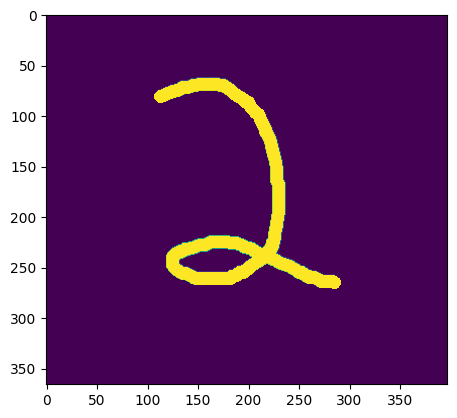

In [53]:
plt.imshow(image[0])
plt.show()